# Customer Segmentation for a Sports Facility

<div class="alert alert-block alert-info">

[1. Objectives](#1st-bullet)<br>
[2. Import Data/Libraries](#2nd-bullet)<br>  
[3. Data Exploration](#3rd-bullet)<br>  
[4. Data Visualization](#4th-bullet)<br> 
[5. Pre-Processing](#5th-bullet)<br> 


</div>

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 1. Objectives 
</div>

1. Explore the data and identify the variables that should be used to segment customers.
2. Identify customer segments
3. Justify the number of clusters chosen (taking in consideration the business use as well).
4. Explain the clusters found.
5. Suggest business applications for the findings and define general marketing approaches for each cluster.


<div class="alert alert-block alert-success">

<a class="anchor" id="2nd-bullet">    </a>
## 2. Import Libraries/Data
</div>

In [229]:
#pip install ydata-profiling --user

In [230]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil #round number to closest integer

from ydata_profiling import ProfileReport

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [231]:
data = pd.read_csv('XYZ_sports_dataset.csv', sep =';') 

<div class="alert alert-block alert-success">

<a class="anchor" id="3rd-bullet">    </a>
## 3. Data Exploration 
</div>

In [232]:
data.head()

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
0,10000,60,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,...,0.0,9.0,7,NaN,6.28,2,0,0.0,0,0
1,10001,29,Female,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,...,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1
2,10002,23,Male,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,...,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1
3,10003,9,Male,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,...,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1
4,10004,35,Male,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,...,NaN,41.0,0,7.0,60.97,0,3,0.0,0,1


It is easily noted that our data contains missing values encoded as NaN.

#### Data Types:

In [233]:
data.dtypes

ID                              int64
Age                             int64
Gender                         object
Income                        float64
EnrollmentStart                object
EnrollmentFinish               object
LastPeriodStart                object
LastPeriodFinish               object
DateLastVisit                  object
DaysWithoutFrequency            int64
LifetimeValue                 float64
UseByTime                       int64
AthleticsActivities           float64
WaterActivities               float64
FitnessActivities             float64
DanceActivities               float64
TeamActivities                float64
RacketActivities              float64
CombatActivities              float64
NatureActivities              float64
SpecialActivities             float64
OtherActivities               float64
NumberOfFrequencies           float64
AttendedClasses                 int64
AllowedWeeklyVisitsBySLA      float64
AllowedNumberOfVisitsBySLA    float64
RealNumberOf

- Date objects could be turned into a datetime type for easier manipulation and interpretation.
- Binary variables are all int/float types. **should they be boolean? In lab4 we turn variables like this to boolean...**

In [234]:
'''
data['UseByTime'] = data['UseByTime'].astype("boolean")
data['AthleticsActivities'] = data['AthleticsActivities'].astype("boolean")
data['WaterActivities'] = data['WaterActivities'].astype("boolean")
data['FitnessActivities'] = data['FitnessActivities'].astype("boolean")
data['DanceActivities'] = data['DanceActivities'].astype("boolean")
data['TeamActivities'] = data['TeamActivities'].astype("boolean")
data['RacketActivities'] = data['RacketActivities'].astype("boolean")
data['CombatActivities'] = data['CombatActivities'].astype("boolean")
data['NatureActivities'] = data['NatureActivities'].astype("boolean")
data['SpecialActivities'] = data['SpecialActivities'].astype("boolean")
data['OtherActivities'] = data['OtherActivities'].astype("boolean")
data['HasReferences'] = data['HasReferences'].astype("boolean")
data['Dropout'] = data['Dropout'].astype("boolean")
'''

'\ndata[\'UseByTime\'] = data[\'UseByTime\'].astype("boolean")\ndata[\'AthleticsActivities\'] = data[\'AthleticsActivities\'].astype("boolean")\ndata[\'WaterActivities\'] = data[\'WaterActivities\'].astype("boolean")\ndata[\'FitnessActivities\'] = data[\'FitnessActivities\'].astype("boolean")\ndata[\'DanceActivities\'] = data[\'DanceActivities\'].astype("boolean")\ndata[\'TeamActivities\'] = data[\'TeamActivities\'].astype("boolean")\ndata[\'RacketActivities\'] = data[\'RacketActivities\'].astype("boolean")\ndata[\'CombatActivities\'] = data[\'CombatActivities\'].astype("boolean")\ndata[\'NatureActivities\'] = data[\'NatureActivities\'].astype("boolean")\ndata[\'SpecialActivities\'] = data[\'SpecialActivities\'].astype("boolean")\ndata[\'OtherActivities\'] = data[\'OtherActivities\'].astype("boolean")\ndata[\'HasReferences\'] = data[\'HasReferences\'].astype("boolean")\ndata[\'Dropout\'] = data[\'Dropout\'].astype("boolean")\n'

#### Missing Values:

In [235]:
data.isna().sum()[data.isna().sum()!=0]

Income                      495
AthleticsActivities          36
WaterActivities              37
FitnessActivities            35
DanceActivities              36
TeamActivities               35
RacketActivities             37
CombatActivities             33
NatureActivities             47
SpecialActivities            44
OtherActivities              35
NumberOfFrequencies          26
AllowedWeeklyVisitsBySLA    535
HasReferences                12
dtype: int64

There are some missing values that need to be adressed during the detailed exploration of each variable.

#### Duplicated

In [236]:
data.duplicated().sum()

0

There are no duplicated clients.

#### Descriptive Analysis:

In [237]:
data.describe(include="all").T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,14942.0,NaN,NaN,NaN,17470.5,4313.528196,10000.0,13735.25,17470.5,21205.75,24941.0
Age,14942.0,NaN,NaN,NaN,26.015794,14.156582,0.0,19.0,23.0,31.0,87.0
Gender,14942,2,Female,8931,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,14447.0,NaN,NaN,NaN,2230.816086,1566.527734,0.0,1470.0,1990.0,2790.0,10890.0
EnrollmentStart,14942,1490,2015-03-02,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnrollmentFinish,14942,1300,2015-09-16,1684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LastPeriodStart,14942,12,2019-07-01,3172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LastPeriodFinish,14942,11,2019-12-31,3694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DateLastVisit,14942,1384,2019-10-31,475,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DaysWithoutFrequency,14942.0,NaN,NaN,NaN,81.224936,144.199576,0.0,13.0,41.0,83.75,1745.0


Looking at the descriptive analysis, some possible problems appear:
- For `Age` there seem to be some clients with age 0. The data is also skewed towards younger ages.
- For `Income`, some clients have value 0. It also seems like some extreme values appear for high values of income.
- The number of unique values shows that `LastPeriodStart` and `LastPeriodFinish` have some form of fixed dates.
- `DaysWithoutFrequency`,`LifetimeValue`, `NumberOfFrequencies`, `AttendedClasses`, `AllowedNumberOfVisits` and `RealNumberOfVisits` also seem to have extreme high values.

### Closer Look At Features:

#### ID:

In [238]:
data['ID'].value_counts()

ID
10000    1
19966    1
19954    1
19955    1
19956    1
        ..
14984    1
14985    1
14986    1
14987    1
24941    1
Name: count, Length: 14942, dtype: int64

All ID's are unique so we can set it as the index:

In [239]:
data.set_index('ID', inplace=True) 

In [240]:
data.duplicated().sum()

1

We now have one duplicated entry that needs to be removed:

In [241]:
data.drop_duplicates(inplace=True)

### Coherence Check

#### Age:

In [242]:
np.sort(data['Age'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87])

- All age values seem normal for a sport facility.
- Special attention to babies (0-3) and other childreen under 16 needs to be taken.

#### Income:

Children under 16 should have no income:

In [243]:
data[data['Age']<16][data['Income']!=0]

/var/folders/x6/c7bgz3zn0hg_kdmljrfw7k_m0000gn/T/ipykernel_4605/702331251.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['Age']<16][data['Income']!=0]


,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
ID,,,,,,,,,,,,,,,,,,,,,
10076,9,Male,NaN,2017-09-16,2017-09-16,2019-07-01,2019-12-31,2019-10-26,5,708.20,...,0.0,64.0,64,2.0,17.42,6,2,0.0,0,0
10224,7,Male,NaN,2016-04-20,2018-11-11,2018-07-01,2018-12-31,2018-10-25,17,836.60,...,0.0,107.0,91,2.0,11.72,6,3,0.0,0,1
10226,10,Female,NaN,2016-11-14,2016-11-14,2019-07-01,2019-12-31,2019-10-26,5,1331.55,...,0.0,65.0,47,1.0,8.71,4,3,0.0,0,0
10261,3,Male,NaN,2017-09-07,2017-09-07,2019-07-01,2019-12-31,2019-10-19,12,1066.40,...,0.0,78.0,62,2.0,17.42,5,2,0.0,0,0
10295,5,Female,NaN,2015-03-05,2015-03-05,2019-07-01,2019-12-31,2019-09-07,54,286.30,...,0.0,15.0,7,1.0,3.14,0,5,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24804,4,Female,NaN,2016-03-05,2016-03-05,2019-07-01,2019-12-31,2019-10-26,5,1656.30,...,0.0,95.0,88,2.0,9.72,3,4,0.0,0,0
24830,2,Male,2750.0,2018-07-26,2018-07-26,2019-07-01,2019-12-31,2019-10-19,12,773.32,...,0.0,27.0,20,2.0,17.42,8,2,0.0,0,0
24836,5,Male,NaN,2018-07-02,2018-07-02,2019-07-01,2019-12-31,2019-10-30,1,654.60,...,0.0,20.0,20,2.0,15.42,9,2,0.0,0,0


There are 360 entries that need to have income set as 0:

In [244]:
data.loc[data["Age"] < 16 , "Income"] = 0

#### Gender:

In [245]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

Values for `Gender` are normal.

#### EnrollmentStart / EnrollmentFinish / LastPeriodStart / LastPeriodFinish / DateLastVisit:

Dates should be DateTime format:

In [246]:
data['EnrollmentStart'] = pd.to_datetime(data['EnrollmentStart'])
data['EnrollmentFinish'] = pd.to_datetime(data['EnrollmentFinish'])

data['LastPeriodStart'] = pd.to_datetime(data['LastPeriodStart'])
data['LastPeriodFinish'] = pd.to_datetime(data['LastPeriodFinish'])

data['DateLastVisit'] = pd.to_datetime(data['DateLastVisit'])

Some entries have enrollment start equal to enrollment finish:

In [247]:
data[data['EnrollmentStart'] == data['EnrollmentFinish']]['Dropout'].value_counts()

Dropout
0    2422
Name: count, dtype: int64

All clients in this situation have 'Dropout' status set to 0.

In [248]:
data[data['EnrollmentStart'] == data['EnrollmentFinish']]['LastPeriodFinish'].value_counts()

LastPeriodFinish
2019-12-31    2038
2019-06-30     186
2018-12-31     117
2017-12-31      22
2016-12-31      20
2018-06-30      20
2017-06-30       9
2016-06-30       5
2015-06-30       3
2015-12-31       2
Name: count, dtype: int64

Most cases seem to be of clients with current active contracts (Finishing on '2019-12-31'). \
We need to take a deeper look at other cases:

#### Members who have not been active in current Period (from 2019-07-01 untill 2019-12-31):

Checking clients who have not been to the facility in the current period:

In [249]:
data.loc[data['DateLastVisit']< '2019-06-30', 'Dropout'].value_counts()

Dropout
1    11335
0      324
Name: count, dtype: int64

In [250]:
data[data['DateLastVisit']< '2019-06-30'].loc[data['Dropout']== 0][data['EnrollmentFinish'] != data['EnrollmentStart']]

/var/folders/x6/c7bgz3zn0hg_kdmljrfw7k_m0000gn/T/ipykernel_4605/30699012.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['DateLastVisit']< '2019-06-30'].loc[data['Dropout']== 0][data['EnrollmentFinish'] != data['EnrollmentStart']]


,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
ID,,,,,,,,,,,,,,,,,,,,,


The people who had DateLastVisit < '2019-06-30' and don't have a Dropout all have have 'EnrollmentStart'= 'EnrolmentFinish', which tells us that:
- these people have dropped out but have not been added to the system as dropouts.
- Their contract is still active as they've been paying, but not coming to the gym.

How can we deal with these inconsistencies?
1) If `DateLastVisit` matches the Last Period of activity (not current Period), clients are considered dropouts (all date are correct but Enrollment Dates) and have `EnrollmentFinish` on `DateLastVisit`.
2) Other clients are considered active: `LastPeriodFinish`should be '2019-12-31' and `EnrollmentFinish` on '2019-10-31'.


##### Dropouts:

We create a mask to select clients who follow condition **1** and should be considered dropouts:

In [251]:
drop_mask = (
    (data['EnrollmentStart'] == data['EnrollmentFinish']) &
    (data['LastPeriodStart']<= data['DateLastVisit']) &
    (data['DateLastVisit']<= data['LastPeriodFinish']) &
    (data['DateLastVisit'] < pd.Timestamp(dt.date(2019,6,30)))
)
index_dropout = data.index[drop_mask].tolist()

`Dropout` should be set to 1 and `EnrollmentFinish` to the respective `DateLastVisit`

In [252]:
data.loc[index_dropout, 'Dropout']=1

In [253]:
data.loc[index_dropout, 'EnrollmentFinish'] = data.loc[index_dropout, 'DateLastVisit']

##### Non - Drop Out:

Looking at the non - dropout clients, instances where `LastPeriodFinish` is not '2019-12-31' will be considered errors and removed, as they contain too many discrepencies to be considered viable.

In [254]:
mask = ( 
    (data['EnrollmentStart'] == data['EnrollmentFinish']) &
    (data['DateLastVisit']< '2019-06-30') 
)

In [255]:
data[mask]['LastPeriodFinish'].value_counts()

LastPeriodFinish
2019-12-31    81
2019-06-30     4
2018-12-31     4
2016-12-31     1
2018-06-30     1
Name: count, dtype: int64

In [256]:
drop_mask = ( 
    (data['EnrollmentStart'] == data['EnrollmentFinish']) &
    (data['DateLastVisit']< '2019-06-30') &
    (data['LastPeriodFinish']!= pd.Timestamp(dt.date(2019,12,31)))
)
index_dropout = data.index[drop_mask].tolist()

In [257]:
data.drop(index_dropout, inplace = True)

All other instances that have `EnrollmentStart` equal to `EnrollmentFinish` are considered active members:\
`LastPeriodFinish`should be '2019-12-31' and `EnrollmentFinish` on '2019-10-31'

In [258]:
data.loc[data[data['EnrollmentFinish'] == data['EnrollmentStart']].index.tolist(), 'LastPeriodFinish']='2019-12-31'

In [259]:
data.loc[data[data['EnrollmentFinish'] == data['EnrollmentStart']].index.tolist(), 'EnrollmentFinish']= '2019-10-31'

Clients who have a LastPeriod that doesn't match neither the:
- DateLastVisit: Last time client was at the facility
- EnrollmentFinish: End of contract

Are all dropouts that show inconsistencies in the date type variables:

In [260]:
mask = (
    ~((data['LastPeriodStart'] <= data['EnrollmentFinish']) & (data['EnrollmentFinish'] <= data['LastPeriodFinish'])) &
    ~((data['LastPeriodStart'] <= data['DateLastVisit']) & (data['DateLastVisit'] <= data['LastPeriodFinish']))
)

In [261]:
data.loc[data.index[mask].tolist()].Dropout.value_counts()

Dropout
1    128
Name: count, dtype: int64

Depending on clustering results these clients can either be:
- Dropped totally from dataset as they represent 0.86% of entries;
- Left as they are;

In [262]:
#data.drop(data.index[mask].tolist(), inplace = True)

### DaysWithoutFrequency

When reading the metadata, `DaysWithoutFrequency` is said to be a variable that has values only for dropouts.

Looking at our data, we see that this variable is calculated for all clients (even non dropouts), so we consider this variable with a new meaning:\
Days without frequency for all clients (until their current or last contract ended - `EnrollmentFinish`)

In [263]:
data[data['Dropout'] == 0]['DaysWithoutFrequency'].value_counts()

DaysWithoutFrequency
0      429
1      404
5      300
2      253
3      206
      ... 
751      1
132      1
55       1
145      1
185      1
Name: count, Length: 137, dtype: int64

Since we have changed values for `EnrollmentFinish`, these values will have to be recalculated to express correct values.

### Activities:

In [264]:
activities = ['AthleticsActivities', 'WaterActivities','FitnessActivities','DanceActivities','TeamActivities','RacketActivities','CombatActivities','NatureActivities','SpecialActivities','OtherActivities']

We need to fix some inconsistencies:
- Until 3 years of age, clients can only do `WaterActivities`` or `OtherActivities``
- Until 16 years of age, clients can't do fitness activities.

Children **under three** only have `WaterActivites` and 3 entries with `FitnessActivities` (that are droped)

In [265]:
data[data['Age']<3][activities].value_counts()

AthleticsActivities  WaterActivities  FitnessActivities  DanceActivities  TeamActivities  RacketActivities  CombatActivities  NatureActivities  SpecialActivities  OtherActivities
0.0                  1.0              0.0                0.0              0.0             0.0               0.0               0.0               0.0                0.0                369
                     0.0              1.0                0.0              0.0             0.0               0.0               0.0               0.0                0.0                  3
Name: count, dtype: int64

In [266]:
mask = (
    (data['Age']<3)
    &(data['FitnessActivities'] ==1)
)

In [267]:
data.drop(data.index[mask].tolist(), inplace = True)

Children **under 16** have 12 entries with `FitnessActivities` (we turn these values into 0)

In [268]:
data[data['Age']<16]['FitnessActivities'].value_counts()

FitnessActivities
0.0    2309
1.0      12
Name: count, dtype: int64

In [269]:
mask = (
        (data['Age']<16)
    &(data['FitnessActivities'] ==1)
)

In [270]:
data.loc[data.index[mask].tolist(), 'FitnessActivities'] = 0

### AllowedNumberOfVisitsBySLA

This variable represents the allowed number of visits, but is expressed in float form.\
 Turning it into the closest integer should be done so the variable is coherent with it's meta data.

In [271]:
data['AllowedNumberOfVisitsBySLA']

ID
10000     6.28
10001    17.42
10002    30.03
10003    17.72
10004    60.97
         ...  
24937    34.84
24938    60.97
24939    30.03
24940    15.87
24941    60.97
Name: AllowedNumberOfVisitsBySLA, Length: 14928, dtype: float64

### HasReference / NumberOfReferences

We need to make sure these two variables are coherent with each other:
- If clients has no refences, he can't have a number of references >0.
- If client has references, he can't have a number of references = 0.


In [272]:
mask = (
    (data['HasReferences']==0)
    &(data['NumberOfReferences']!=0)
)

In [273]:
data[mask].shape

(0, 30)

Some clients have `HasReferences` set to 1 but `NumberOfReferences` equal to 0.\
We change `HasReferences` to 0 so these entries become coherent.

In [274]:
mask = (
    (data['HasReferences']==1)
    &(data['NumberOfReferences']==0)
)

In [275]:
data[mask].shape

(13, 30)

In [276]:
data.loc[data.index[mask].tolist(), 'HasReferences'] = 0

**The variables will be further explored using visualizations:**

<div class="alert alert-block alert-success">

<a class="anchor" id="4th-bullet">    </a>
## 4. Data Visualization 
</div>

Visualizing our data can help us understand more about the distribution of the featues and find possible incoherences.

We start by separating metric, non-metric and date type features:

In [277]:
metric_features = ['Age','Income','DaysWithoutFrequency','LifetimeValue','NumberOfFrequencies', 'AttendedClasses', 'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA','RealNumberOfVisits','NumberOfRenewals','NumberOfReferences']
date_features = ['EnrollmentStart','EnrollmentFinish','LastPeriodStart','LastPeriodFinish','DateLastVisit']
non_metric_features = data.columns.drop(metric_features + date_features).to_list()

### Metric-Features

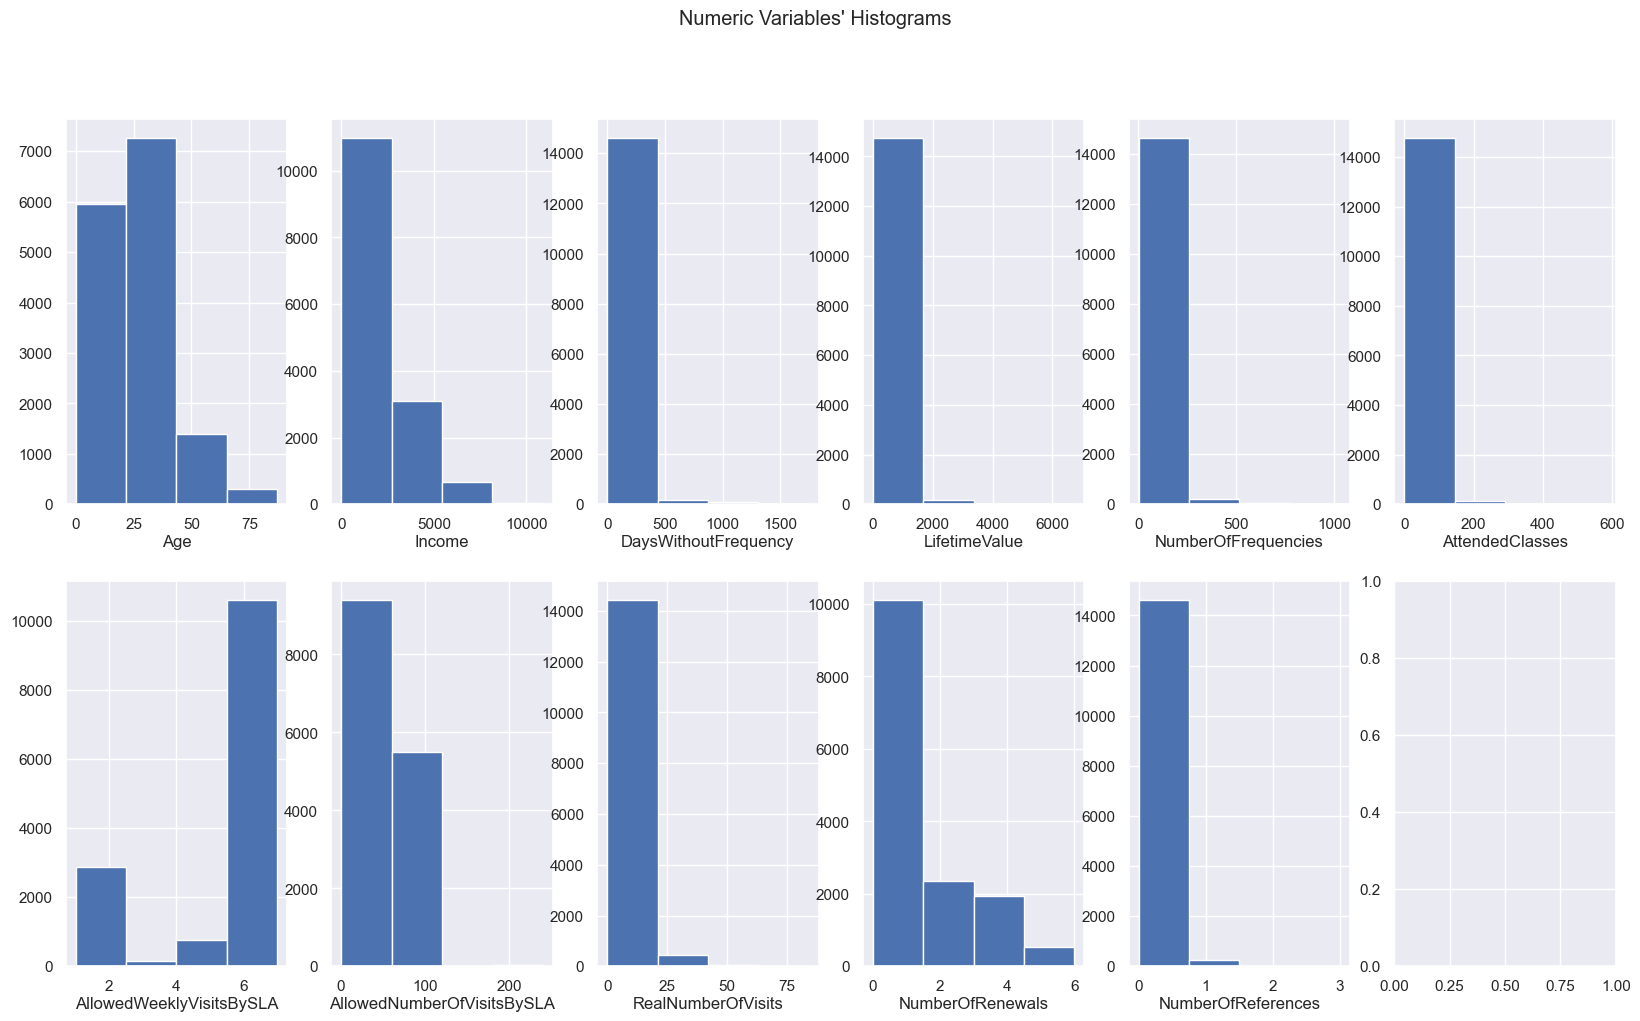

In [278]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(data[feat], bins = 4)
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

""""
To save pictures at the end
if not os.path.exists(os.path.join('..', 'figures', 'exp_analysis')):
    # if the exp_analysis directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'exp_analysis'))
    
plt.savefig(os.path.join('..', 'figures', 'exp_analysis', 'numeric_variables_histograms.png'), dpi=200)
"""
plt.show()

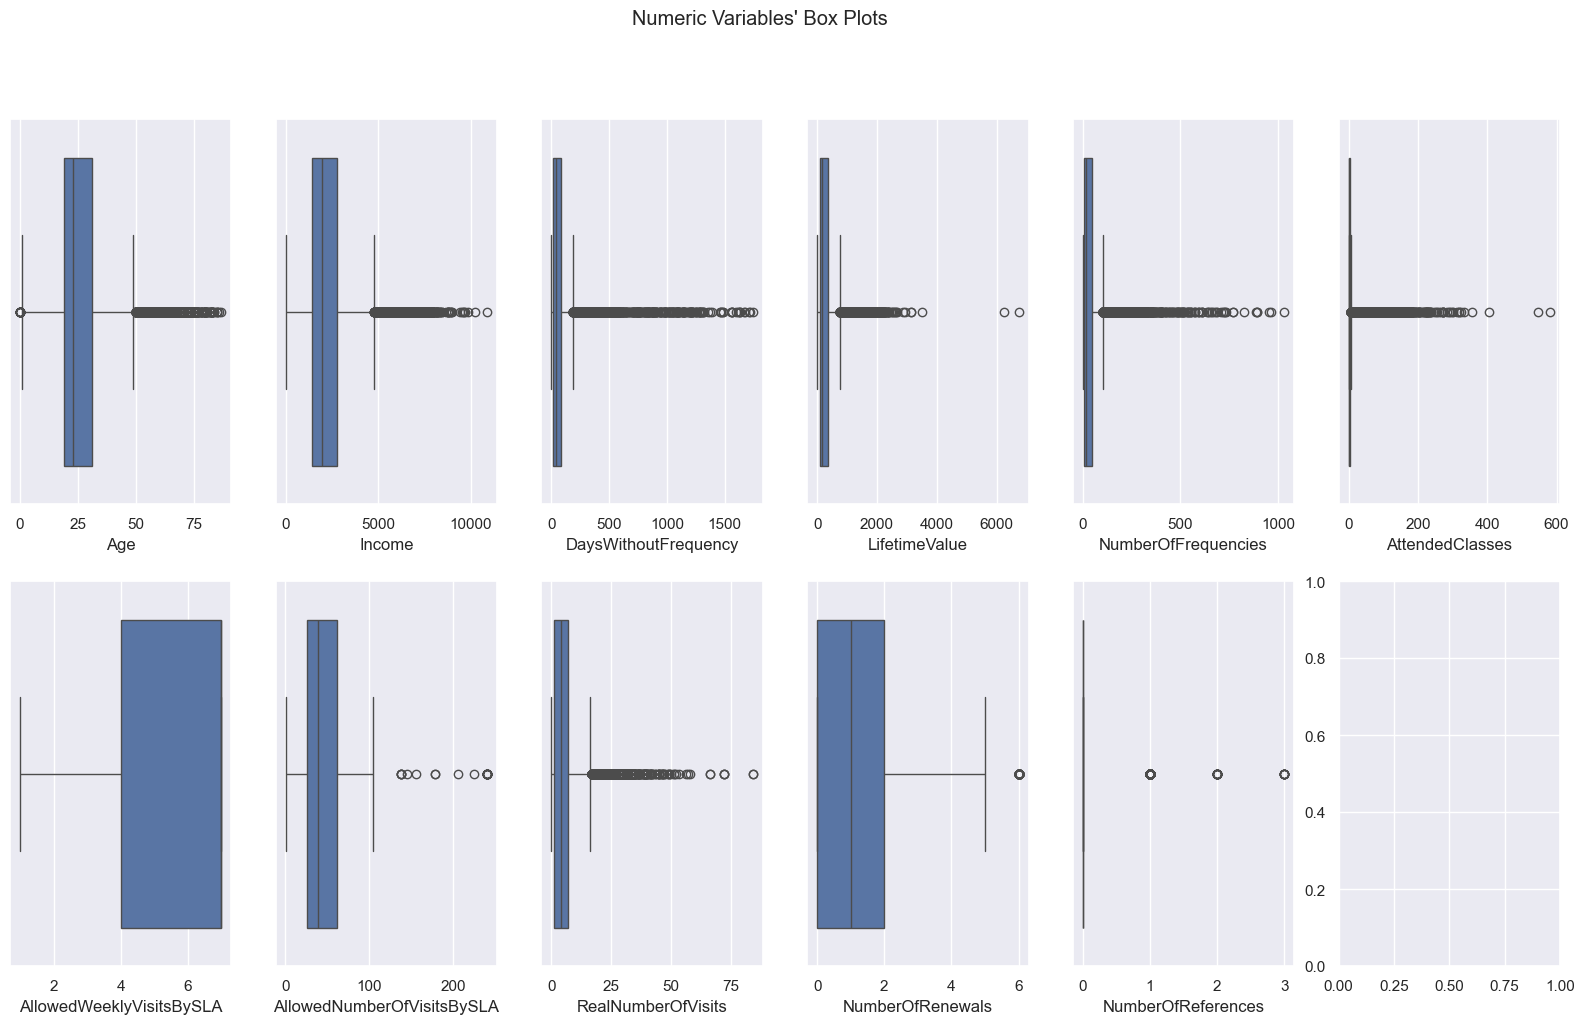

In [279]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)
""""
# Save the figure
if not os.path.exists(os.path.join('..', 'figures', 'exp_analysis')):
    # if the exp_analysis directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'exp_analysis'))
    
plt.savefig(os.path.join('..', 'figures', 'exp_analysis', 'numeric_variables_boxplots.png'), dpi=200)
"""
plt.show()

By observing the above histograms and box plots, we notice that most variables have a skewed distribution that can symbolize the existence of outliers.
- `NumberOfReferences` and `AttendedClasses` are the most skewed ones.

This is extremely important information about our numeric variables, as these values can influence models negatively.\
Besides this behaviour, some other details were found:
- `DaysWithoutFrequency` has people with more than 4 years without frequency;
- `LifeTimeValue` seems to have clients with a total value of 0;

/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


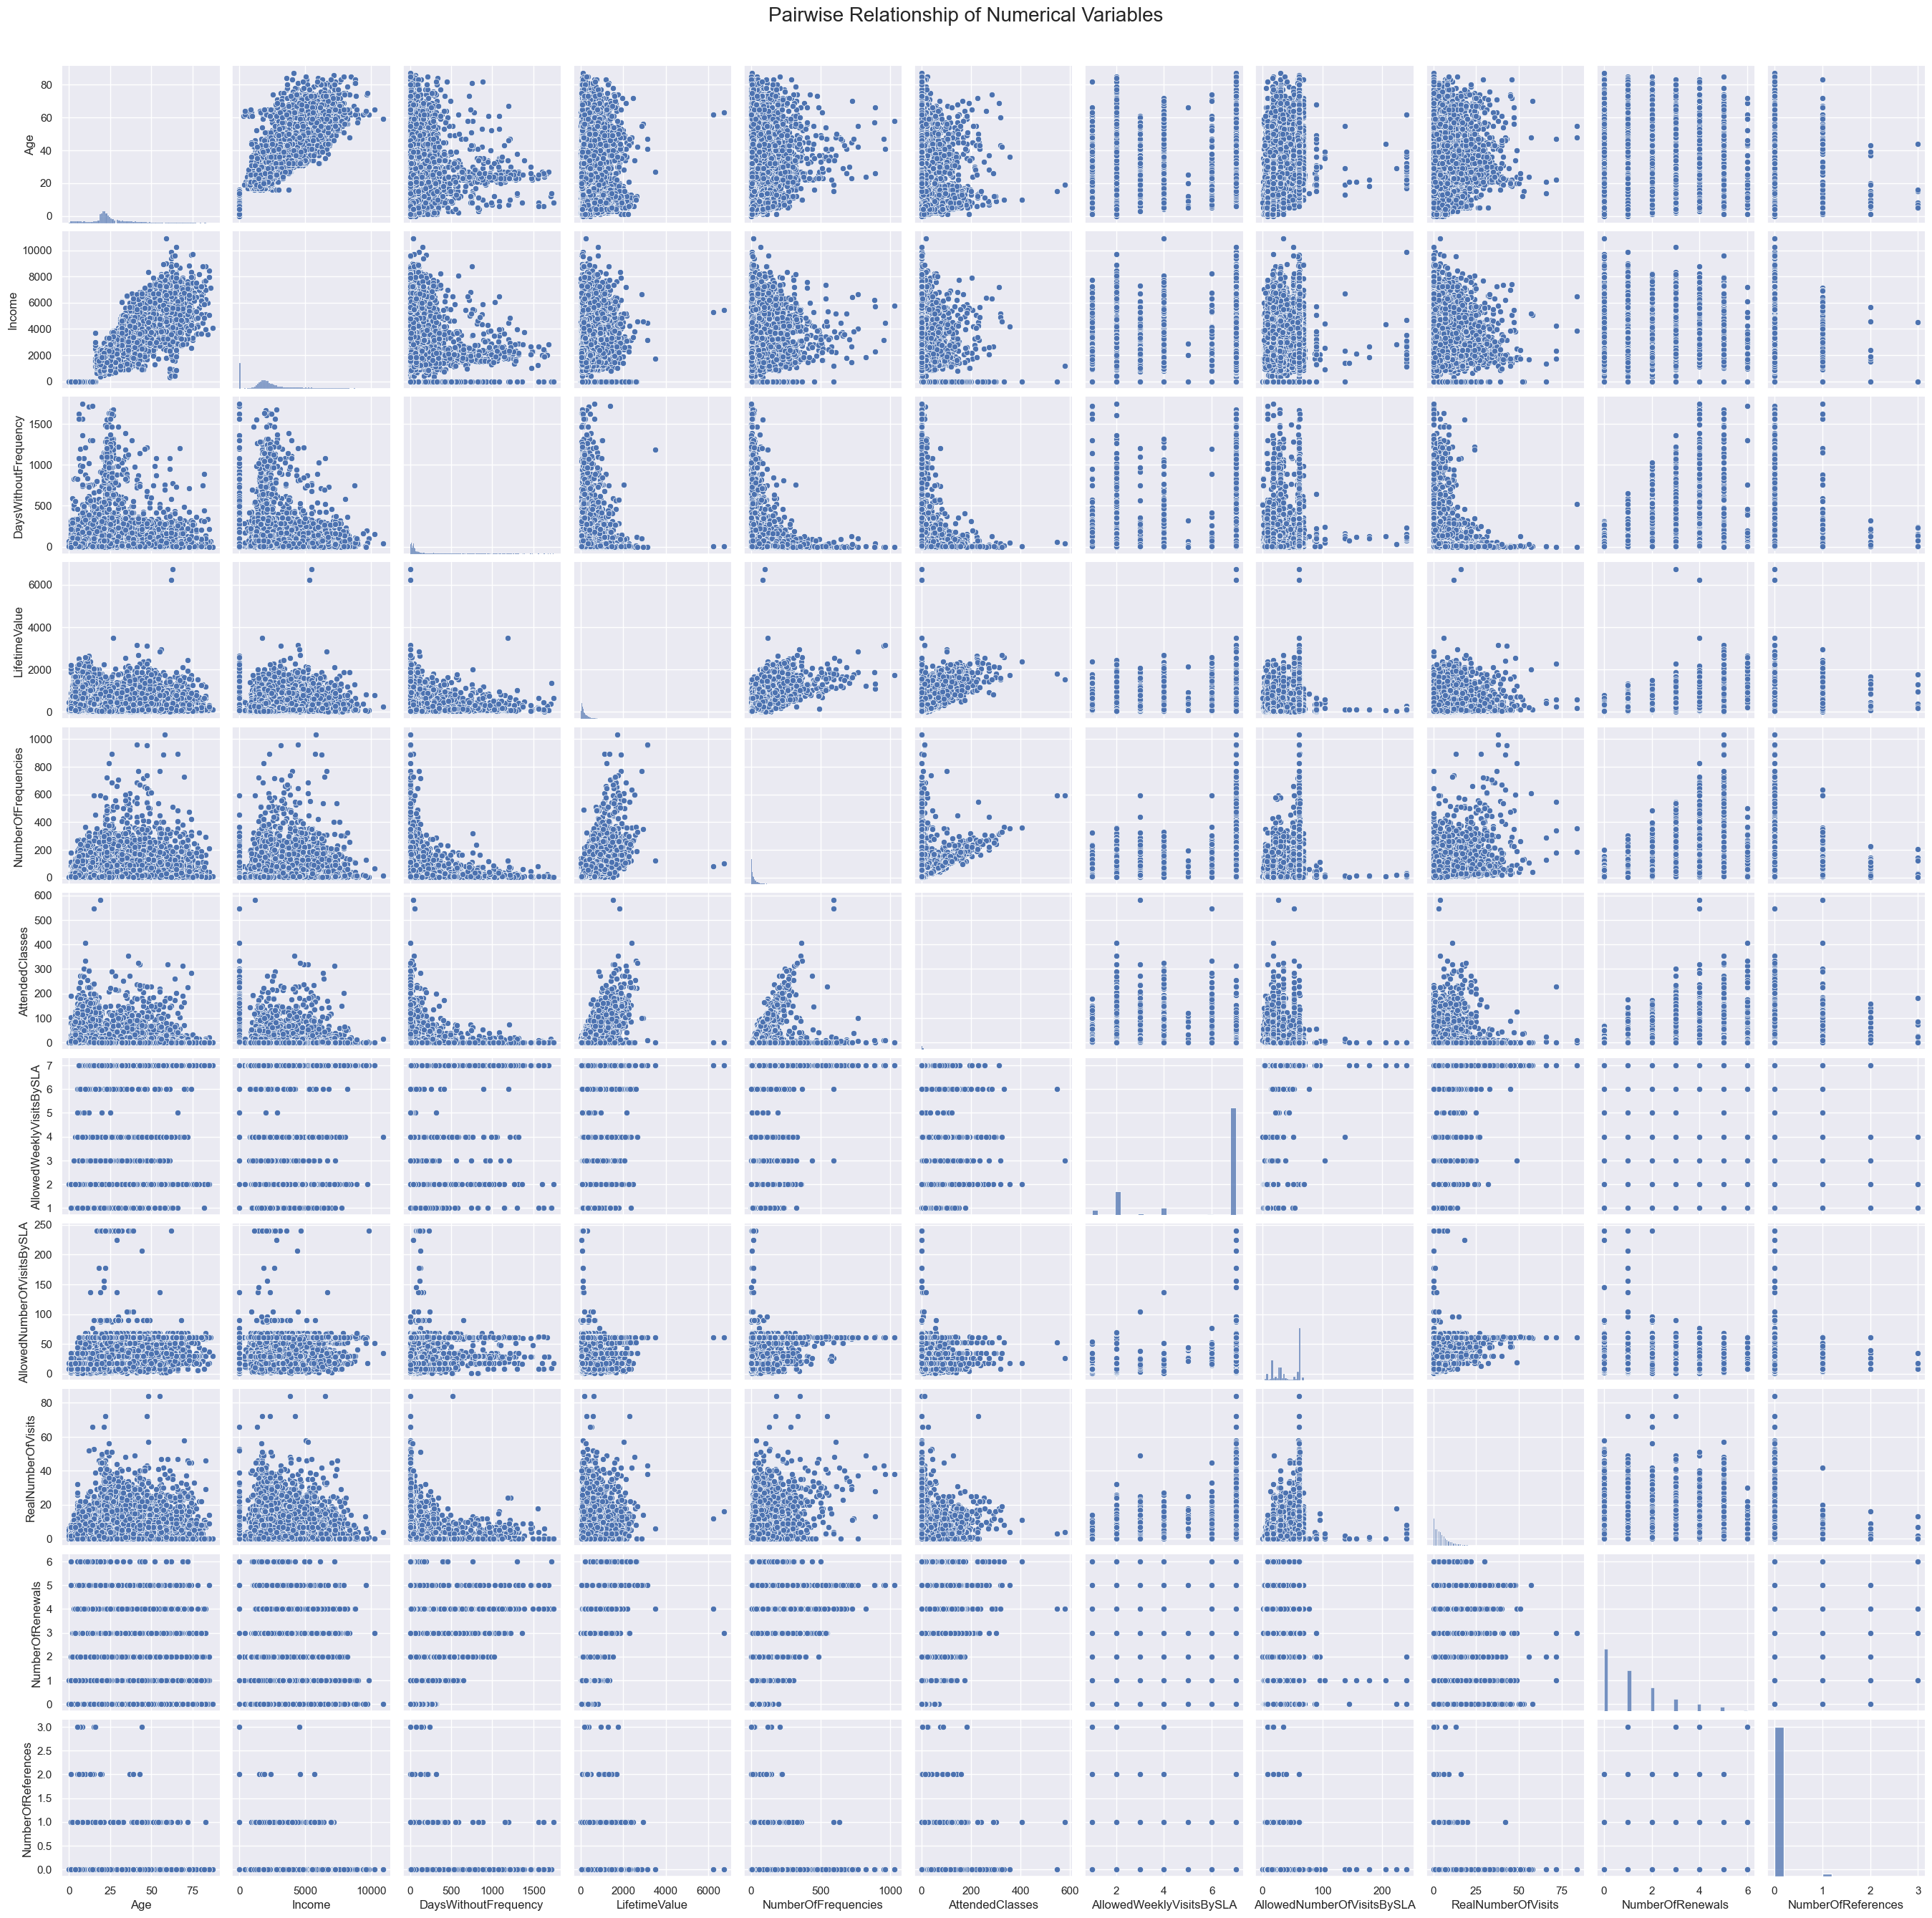

In [280]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(data[metric_features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)
""""
if not os.path.exists(os.path.join('..', 'figures', 'exp_analysis')):
    # if the exp_analysis directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'exp_analysis'))
    
plt.savefig(os.path.join('..', 'figures', 'exp_analysis', 'pairwise_relationship_of_numerical_variables.png'), dpi=200)
"""
plt.show()

We can see from the relationship plots above that:
- `Age` and `Income` seem to have a positive relation;
- `NumberOfFrequencies` and `AttendedClasses` seem to relate positively with `LifetimeValue`;

### Non-Metric-Features

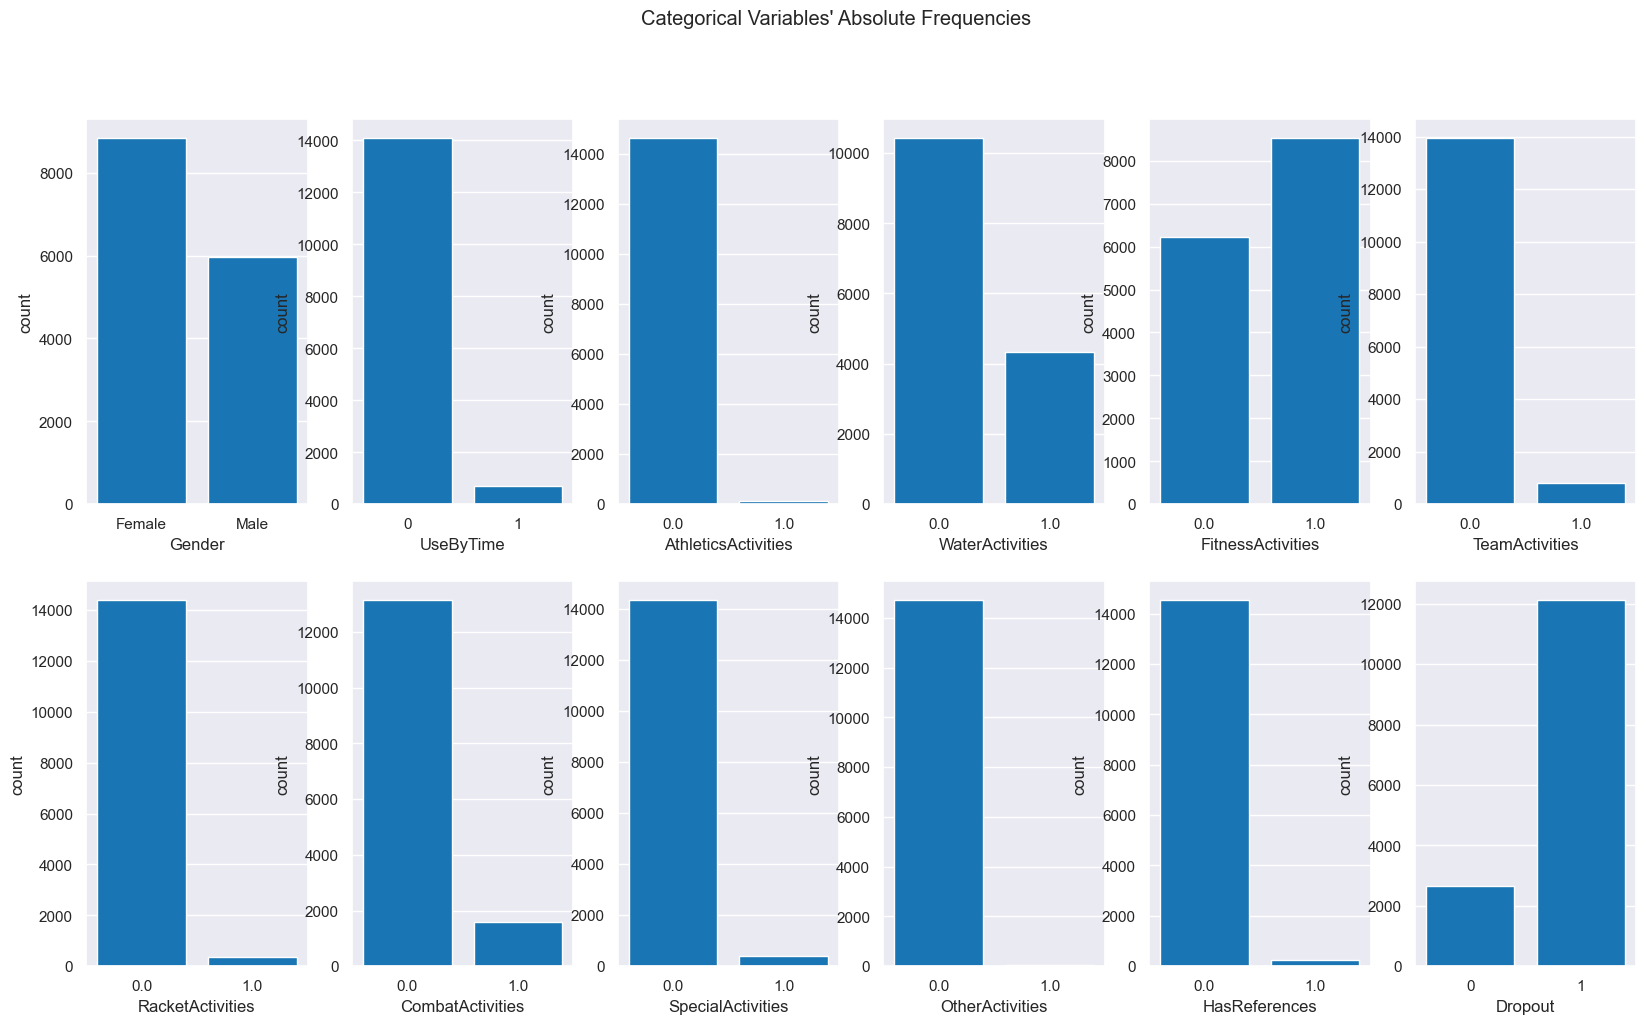

In [312]:
# All Non-Metric Variables' Absolute Frequencies
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each bar plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), non_metric_features): # Notice the zip() function and flatten() method
    sns.countplot(x=data[feat].astype(object), ax=ax, color='#007acc')

title = "Categorical Variables' Absolute Frequencies"
plt.suptitle(title)

#plt.savefig(os.path.join('..', 'figures', 'exp_analysis', 'categorical_variables_frequecies.png'), dpi=200)
plt.show()

From observing the countplots, we notice that `DanceActivities` and `NatureActivities` have no entries set to 1.\
These variables can be considered uniformative and removed:

In [282]:
data[['NatureActivities','DanceActivities']].value_counts()

NatureActivities  DanceActivities
0.0               0.0                14845
Name: count, dtype: int64

In [283]:
data.drop(['NatureActivities','DanceActivities'],axis=1, inplace=True)

In [284]:
non_metric_features.remove('NatureActivities')
non_metric_features.remove('DanceActivities')

Any other important relashionship plot with categorical vs numerical?

<div class="alert alert-block alert-success">

<a class="anchor" id="5th-bullet">    </a>
## 5. Pre-Processing
</div>

## Outlier Removal

Our data is very skewed, so we're getting a very big number of outliers to remove using the standard methods and values, which is not acceptable consideting the porblem in hand.\
To fight this problem, for the approaches used bellow, only very extreme outliers are considered to be removed.

We combine different methods to remove outliers, as to get more robust results:

In [285]:
data_original = data.copy()

#### Selecting outliers manually:

Looking at the distribution of our variables, we can select a threshold of values we consider extreme outliers:

In [286]:
filters0 = (
    (data['NumberOfReferences']<2)
    &(data['NumberOfRenewals']<6)
    &(data['AttendedClasses']<400)
    &(data['LifetimeValue']<4000)
    &(data['RealNumberOfVisits']<60)
)

df_0 = data[filters0]
print('Percentage of data kept after removing outliers:', np.round(df_0.shape[0] / data_original.shape[0], 4))

Percentage of data kept after removing outliers: 0.9916


##### IQR:

In [287]:
q25 = data[metric_features].quantile(.25)
q75 = data[metric_features].quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters1 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters1.append(data[metric].between(llim, ulim, inclusive='both'))

filters1 = pd.Series(np.all(filters1, 0))
filters1.index = data.index
df_1 = data[filters1]
print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / data_original.shape[0], 4))

Percentage of data kept after removing outliers: 0.5202


##### Z-Score:

In [288]:
filters2 = []
for metric in metric_features:
    mean, std = np.mean(data[metric]), np.std(data[metric])
    z_score = np.abs((data[metric] - mean) / std)
    filters2.append(z_score < 3) 

filters2 = pd.Series(np.all(filters2, 0))
filters2.index = data.index
df_2 = data[filters2]
print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / data_original.shape[0], 4))

Percentage of data kept after removing outliers: 0.8378


In [289]:
df_3 = data[(filters1 | filters2| filters0 )]
print('Percentage of data kept after removing outliers:', np.round(df_3.shape[0] / data_original.shape[0], 4))

Percentage of data kept after removing outliers: 0.9916


Our robust approach gives us the same results as applying the manual filter.

Considering the skewness of our data, keeping this approach for an initial outlier removal is perfered, as we opt to remove a maximum of 1% of our data and both IQR and Z-Score tend to consider close to 5% of our data as very extreme outliers (making our threshold bigger converges to these values).

In [290]:
data = df_0.copy()

## Missing Values (Data Imputation)

Only after our outilers are removed can we work of data imputation.

#### KNN Imputer:

A KNNImputer with 5 neighbours will be used for numerical features and with 1 neighbours for categoical ones:

**HOW TO SELECT NUMBER OF NEIGHBOURS TO USE??**

In [291]:
data_knn = data.copy()

For numeric variables:

In [292]:
mv_metric_features = ['Income','NumberOfFrequencies','AllowedWeeklyVisitsBySLA']

In [293]:
#rows with missing values:
nans_index = data[mv_metric_features].isna().any(axis=1)
data_knn[nans_index]

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
ID,,,,,,,,,,,,,,,,,,,,,
10000,60,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,89.35,...,0.0,9.0,7,NaN,6.28,2,0,0.0,0,0
10019,28,Male,2510.0,2019-10-01,2019-10-31,2019-07-01,2019-12-31,2019-10-21,10,52.00,...,0.0,2.0,0,NaN,24.01,2,0,0.0,0,0
10034,74,Female,5210.0,2019-10-01,2019-10-31,2019-07-01,2019-12-31,2019-10-11,20,38.50,...,0.0,4.0,0,NaN,30.03,4,0,0.0,0,0
10068,43,Female,NaN,2016-09-16,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,849.80,...,0.0,214.0,0,7.0,21.98,9,3,0.0,0,1
10107,19,Female,1690.0,2019-10-02,2019-10-31,2019-07-01,2019-12-31,2019-10-15,16,48.00,...,0.0,2.0,0,NaN,28.98,2,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24860,17,Female,1650.0,2019-09-23,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,87.20,...,0.0,3.0,3,NaN,17.16,4,0,0.0,0,0
24863,39,Male,1790.0,2019-10-09,2019-10-31,2019-07-01,2019-12-31,2019-10-24,7,65.20,...,0.0,6.0,0,NaN,21.98,8,0,0.0,0,0
24898,23,Female,1980.0,2019-09-11,2019-10-31,2019-07-01,2019-12-31,2019-10-31,0,68.20,...,0.0,28.0,0,NaN,31.99,19,0,0.0,0,0


In [294]:
imputer = KNNImputer(n_neighbors=5, weights='distance')
data_knn[mv_metric_features] = imputer.fit_transform(data_knn[mv_metric_features]).round(0)

`KNNImputer` creates diferent values for the variables (not always the same value imputed). It is working correctly.

For categorical data:

In [311]:
# por aquele codigo antes?? What código? 

In [297]:
nans_index = data[non_metric_features].isna().any(axis=1)
data_knn[nans_index]

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
ID,,,,,,,,,,,,,,,,,,,,,
10004,35,Male,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,373.2,...,NaN,41.0,0,7.0,60.97,0,3,0.0,0,1
10229,35,Male,3740.0,2017-03-24,2018-07-31,2018-01-01,2018-12-31,2018-07-25,6,475.0,...,0.0,59.0,19,1.0,8.71,8,2,0.0,0,1
10240,40,Female,3070.0,2015-01-07,2015-12-05,2015-07-01,2015-12-31,2015-10-20,46,157.2,...,0.0,6.0,0,7.0,45.99,1,1,0.0,0,1
10333,42,Male,4720.0,2016-11-02,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,885.8,...,0.0,78.0,63,1.0,8.71,3,3,0.0,0,0
10415,53,Female,3290.0,2017-10-07,2019-01-14,2018-07-01,2019-06-30,2018-12-14,31,264.5,...,0.0,9.0,5,7.0,42.00,4,1,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24824,5,Female,0.0,2017-09-05,2018-01-07,2017-07-01,2018-06-30,2017-11-18,50,143.6,...,0.0,7.0,7,2.0,17.42,1,0,0.0,0,1
24835,21,Male,1700.0,2019-03-11,2019-09-10,2019-07-01,2019-12-31,2019-07-30,42,110.2,...,0.0,26.0,0,7.0,62.02,5,1,0.0,0,1
24840,62,Female,3570.0,2016-07-19,2017-04-07,2017-01-01,2017-06-30,2016-10-18,171,186.1,...,0.0,2.0,0,4.0,33.72,0,2,0.0,0,1


### **DO YOU AGREE WITH THIS? SHOULD WE USE KNN WITH BINARY OR CHOOSE ANOTHER METHOD/USE ONLY CENTRAL TENDENCIES (SIMILARITY INDEX?)**
**SE SOUBEREM OUTRO METODO PARA CATEGORICAS POR MIM PODEM MUDAR** 

Variables with missing values are binary and already encoded. This means we can apply a KNNImputer if we consider only the closest neighbour as a solution:

In [298]:
mv_categorical_features = ['AthleticsActivities','WaterActivities','FitnessActivities','TeamActivities','RacketActivities','CombatActivities','SpecialActivities','OtherActivities','HasReferences']

In [299]:
imputer = KNNImputer(n_neighbors=1, weights='uniform')
data_knn[mv_categorical_features] = imputer.fit_transform(data_knn[mv_categorical_features]).round(0)

For most variables, the `KNNImputer` imputes values form both classes and not only a mode. 

#### Central Tendency Imputer:

Central tendency measures could also be applied to non-metric features, with the draw back that these methods possibly change distribution of features and can bring bias with it. Since our data is skewed, measured like median and mean can afect the distribution of our variables.

Since the number of missing values is small for each categorical feature (~0.3%), this approach is also considered:

In [301]:
data_central = data.copy()

#### Remove Entries with NaN

In [302]:
#nao devia ser mv?
data_central[metric_features].median()

Age                             23.00
Income                        1970.00
DaysWithoutFrequency            41.00
LifetimeValue                  163.60
NumberOfFrequencies             18.00
AttendedClasses                  0.00
AllowedWeeklyVisitsBySLA         7.00
AllowedNumberOfVisitsBySLA      39.97
RealNumberOfVisits               4.00
NumberOfRenewals                 1.00
NumberOfReferences               0.00
dtype: float64

In [303]:
modes = data_central[non_metric_features].mode().loc[0]
modes

Gender                 Female
UseByTime                   0
AthleticsActivities       0.0
WaterActivities           0.0
FitnessActivities         1.0
TeamActivities            0.0
RacketActivities          0.0
CombatActivities          0.0
SpecialActivities         0.0
OtherActivities           0.0
HasReferences             0.0
Dropout                     1
Name: 0, dtype: object

In [304]:
data_central.fillna(data_central[metric_features].median(), inplace=True) #replace metric features with median
data_central.fillna(modes, inplace=True) #replace non-metric features with mode
data_central.isna().sum() 

Age                           0
Gender                        0
Income                        0
EnrollmentStart               0
EnrollmentFinish              0
LastPeriodStart               0
LastPeriodFinish              0
DateLastVisit                 0
DaysWithoutFrequency          0
LifetimeValue                 0
UseByTime                     0
AthleticsActivities           0
WaterActivities               0
FitnessActivities             0
TeamActivities                0
RacketActivities              0
CombatActivities              0
SpecialActivities             0
OtherActivities               0
NumberOfFrequencies           0
AttendedClasses               0
AllowedWeeklyVisitsBySLA      0
AllowedNumberOfVisitsBySLA    0
RealNumberOfVisits            0
NumberOfRenewals              0
HasReferences                 0
NumberOfReferences            0
Dropout                       0
dtype: int64

#### We compare the skewness of the data before and after iputation:

In [307]:
def calculate_skewness(data, feature, name):
    aux = []
    for feature in mv_categorical_features:
        aux.append(
            {
                'Feature': feature,
                'Skewness ' + name: data[feature].skew(),
            }
        )
    output = pd.DataFrame(aux)
    output.set_index('Feature', inplace = True)
    return output

In [308]:
data_skw = calculate_skewness(data, mv_categorical_features, "data")
data_central_skw = calculate_skewness(data_central, mv_categorical_features, "data_central")
data_knn_skw = calculate_skewness(data_knn, mv_categorical_features, "data_knn_skw")
pd.concat([data_skw, data_central_skw, data_knn_skw], join="outer", axis = 1)

,Skewness data,Skewness data_central,Skewness data_knn_skw
Feature,,,
AthleticsActivities,11.566127,11.580127,11.580127
WaterActivities,0.910582,0.914470,0.909447
FitnessActivities,-0.317894,-0.322035,-0.317825
TeamActivities,3.939597,3.945128,3.939293
RacketActivities,6.291695,6.300158,6.290425
CombatActivities,2.524107,2.528138,2.525877
SpecialActivities,5.981131,5.990552,5.982061
OtherActivities,22.902773,22.930046,22.930046
HasReferences,7.727259,7.729999,7.729999


**CHECK ALSO FOR NUMERIC VARIABLES THE DIFFERENCE IS SKEWNESS**

Looking at the difference between imputation methods:

In [309]:
(data_knn!= data_central).sum()

Age                             0
Gender                          0
Income                        155
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities             0
WaterActivities                14
FitnessActivities              15
TeamActivities                  2
RacketActivities                1
CombatActivities                2
SpecialActivities               1
OtherActivities                 0
NumberOfFrequencies            23
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      370
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                   0
NumberOfReferences              0
Dropout                         0
dtype: int64

#### Checking difference in distributions:

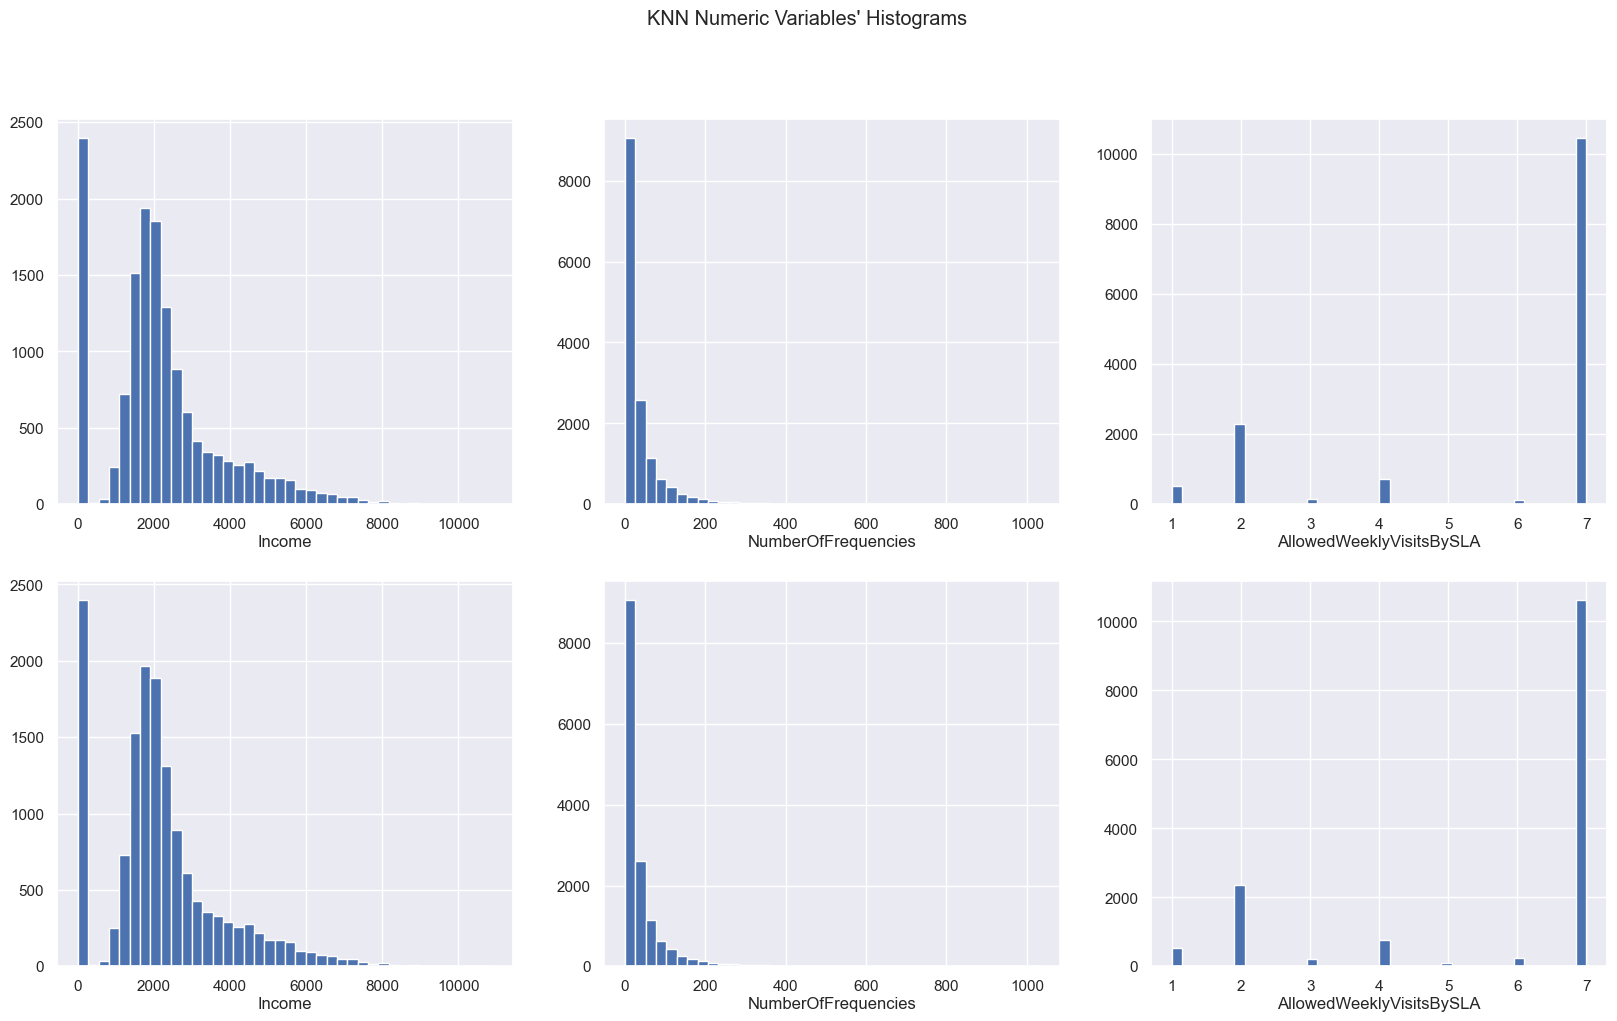

In [310]:
sns.set()

fig, axes = plt.subplots(2, 3, figsize=(20, 11))

for ax, feat in zip(axes[0].flatten(), mv_metric_features): 
    ax.hist(data[feat], bins = 40)
    ax.set_title(feat, y=-0.13)

for ax, feat in zip(axes[1].flatten(), mv_metric_features): 
    ax.hist(data_knn[feat], bins = 40)
    ax.set_title(feat, y=-0.13)
    
title = "KNN Numeric Variables' Histograms"

plt.suptitle(title)
plt.show()

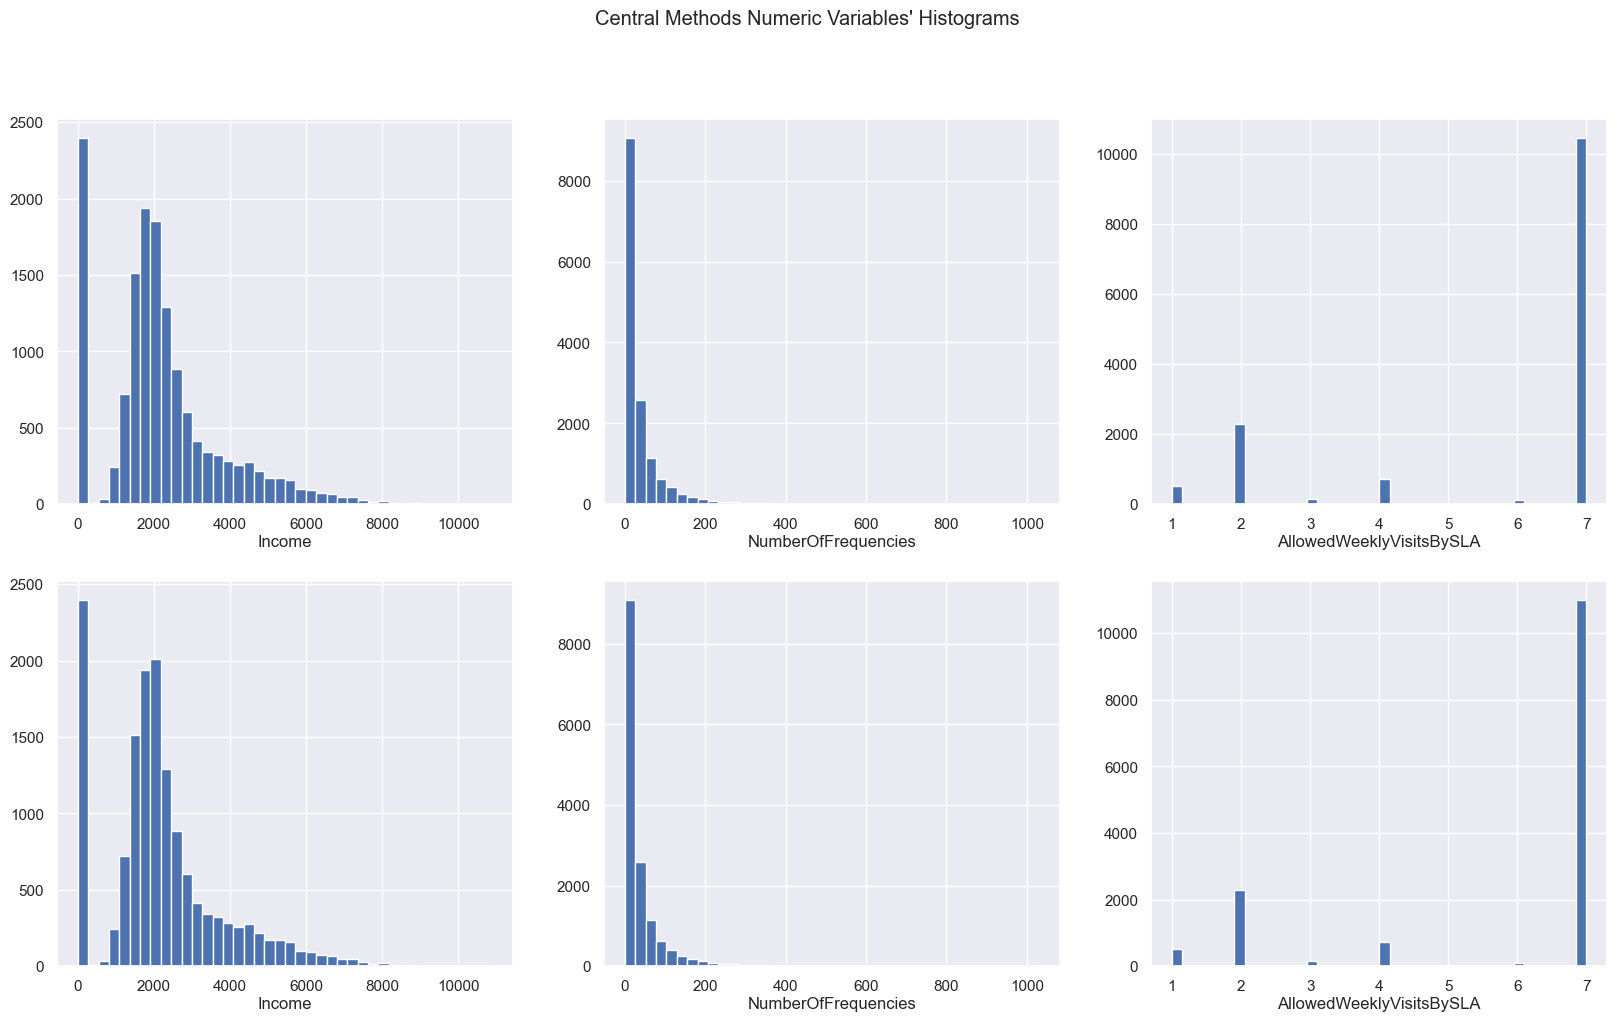

In [315]:
sns.set()

fig, axes = plt.subplots(2, 3, figsize=(20, 11))

for ax, feat in zip(axes[0].flatten(), mv_metric_features): 
    ax.hist(data[feat], bins = 40)
    ax.set_title(feat, y=-0.13)

for ax, feat in zip(axes[1].flatten(), mv_metric_features): 
    ax.hist(data_central[feat], bins = 40)
    ax.set_title(feat, y=-0.13)
    
title = "Central Methods Numeric Variables' Histograms"

plt.suptitle(title)
plt.show()

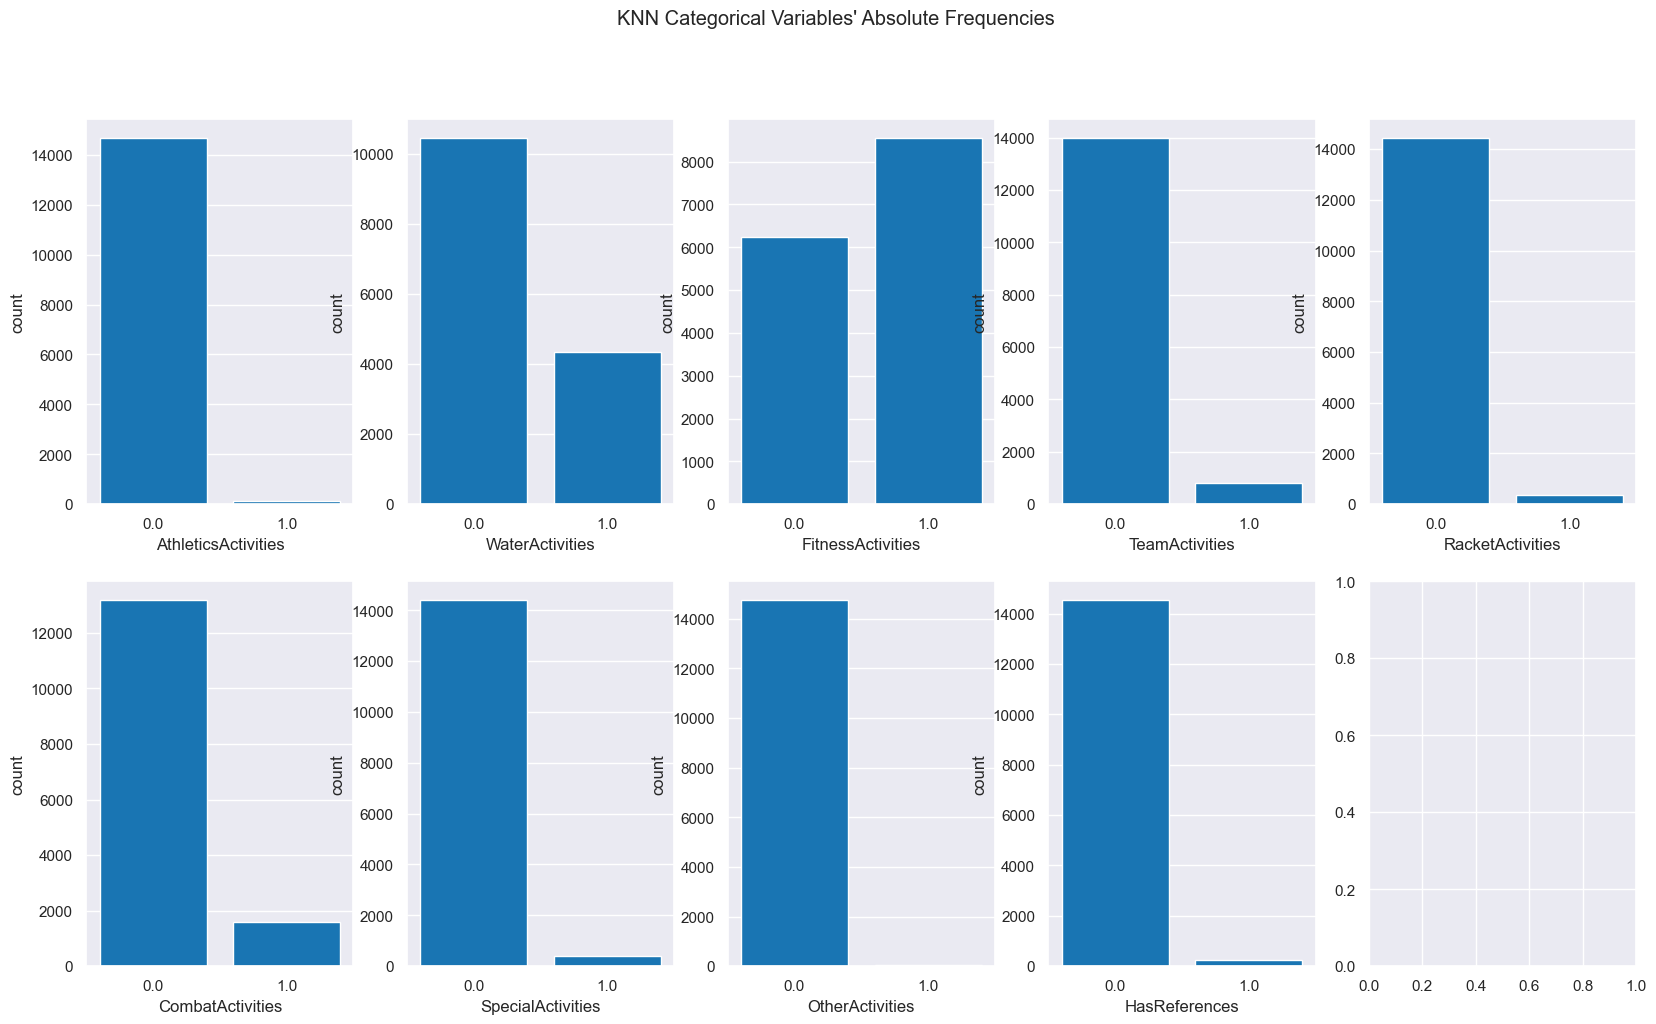

In [314]:
sns.set()
fig, axes = plt.subplots(2, ceil(len(mv_categorical_features) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), mv_categorical_features): 
    sns.countplot(x=data_knn[feat].astype(object), ax=ax, color='#007acc')

title = "KNN Categorical Variables' Absolute Frequencies"
plt.suptitle(title)

plt.show()

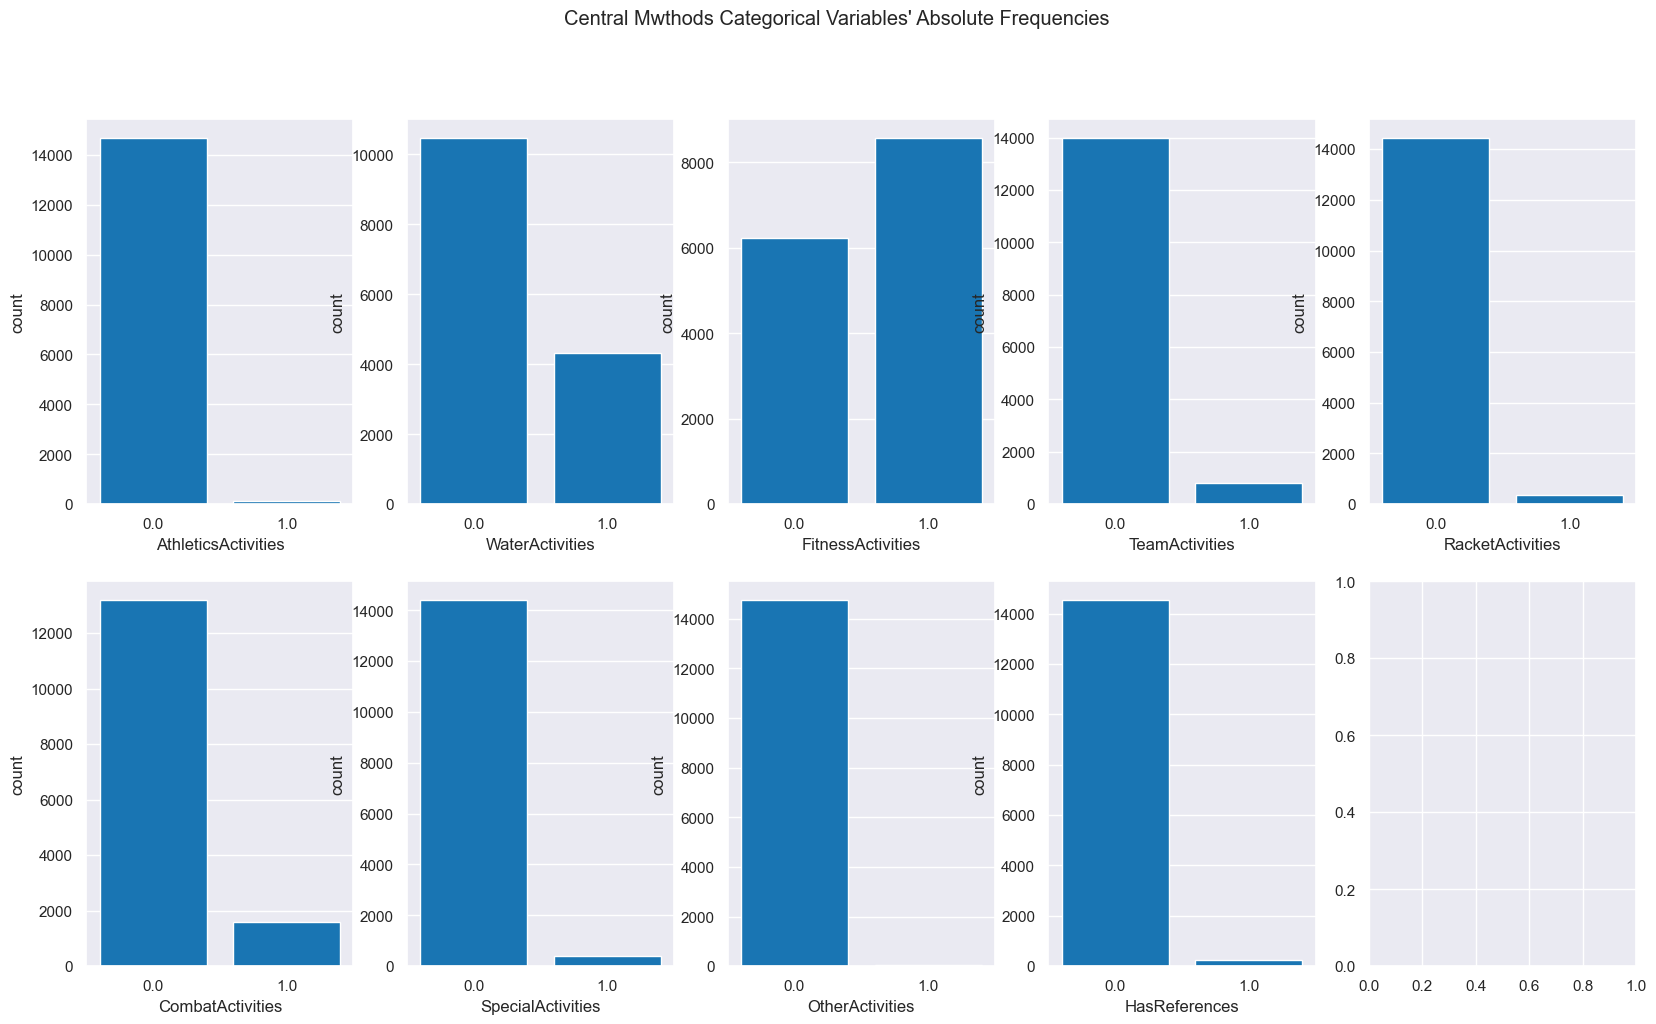

In [316]:
sns.set()
fig, axes = plt.subplots(2, ceil(len(mv_categorical_features) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), mv_categorical_features): 
    sns.countplot(x=data_central[feat].astype(object), ax=ax, color='#007acc')

title = "Central Mwthods Categorical Variables' Absolute Frequencies"
plt.suptitle(title)

plt.show()

For categorical data, the difference between using central tendency measures ou a KNNImputer is less significant.

### **WHICH ONE DO WE KEEP? WHY?**

In [131]:
data = data_central.copy()

In [132]:
data = data_knn.copy()

----

### Depending on the context, various steps must be considered when performing Data Preprocessing. 

The most relevant steps are the following:
- Data wrangling (feature extraction/engineering and transformation)
- Data reduction (reducing the dimensionality of a dataset, producing summary statistics, reducing the number of records in a dataset)

<h2>Feature Engineering

### **Fixing Features**

Lifetimevalue==0??

1) Since we are talking about a number of visits, we transform `AllowedNumberOfVisitsBySLA` into an integer:

In [133]:
data['AllowedNumberOfVisitsBySLA'] = np.round(data['AllowedNumberOfVisitsBySLA']).astype(int)

2) We decide to keep `DaysWithoutFrequency` as a variable thta applies to all clients.
Since we changed some values of `EnrollmentFinish`, we need to recalculate this feature so all values are correct:

In [134]:
data['DaysWithoutFrequency'] = (data['EnrollmentFinish'] -data['DateLastVisit']).dt.days

3) We decide to turn our datetime features into the variables `Active_Period` (number of days of last period of activity) and `Contrac_Duration`.

In [135]:
data['Active_Period'] = (data['LastPeriodFinish']- data['LastPeriodStart'])
data['Active_Period']=data['Active_Period'].dt.days

In [136]:
data['Contract_Duration'] = (data['EnrollmentFinish']- data['EnrollmentStart'])
data['Contract_Duration']=data['Contract_Duration'].dt.days

## **WE COULD ALSO CREATE THRESHOLDS FOR CERTAIN VARIABLES.**

### **Feature Creation**

We try to create new features based on the features we were initially given.\
Our goal is to create as many new features as possible with the information we were given. These features are then selected based on their relevancy and redudancy.

1) Real number of visits in relation to the allowed number of visits

In [137]:
data['PercentageOfVisits'] = ((data['RealNumberOfVisits'] / data['AllowedNumberOfVisitsBySLA'])).round(2)

2) Total number of Activities the client is signed in

In [139]:
data['TotalNumberOfActivities'] = data.iloc[:, 12:19].sum(axis=1).astype(int)

Total Activities can't be 0

3) Monthly paid value

Since it is considered that a sport facility has monthly payments, it is important to understand how much a client pays each month:

In [140]:
data['TotalMonths'] = (data['EnrollmentFinish'] - data['EnrollmentStart']) // np.timedelta64(1, 'M')
data['TotalMonths'] = np.where(data['TotalMonths'] <= 0, 1, data['TotalMonths']) #cases in which is less than one month, we will assume one month

data['MonthlyValue'] = (data['LifetimeValue'] / data['TotalMonths']).round(2)

data.drop('TotalMonths', axis=1, inplace=True) #drop total months column since we only needed it for this code

4) Percentage of visits that were classes

In [141]:
data['PercentageOfClasses'] = (data['AttendedClasses'] / data['NumberOfFrequencies'] * 100).round(2)

5) Number of visits the client made to the facility during their contract

In [142]:
data['Freq_Visits_Day']= (data['NumberOfFrequencies'] / data['Contract_Duration']).round(4)

6) Frequency of classes attended during contract duration

In [143]:
data['Freq_Classes_Contract']= (data['AttendedClasses'] / data['Contract_Duration']).round(4)

7) Frequency of visits made during active period:

In [144]:
data['Visits_ActivePeriod'] = (data['RealNumberOfVisits'] / data['Active_Period']).round(4)

We drop datetime features as they have no importance for clustering purposes:

In [145]:
data.drop(['EnrollmentStart','EnrollmentFinish','LastPeriodStart','LastPeriodFinish','DateLastVisit'], axis =1, inplace = True)

### **Encoding**

From the analysis done previously, only the variable 'Gender' is not encoded. \
We chose to encode this variable into a bianry variable where 1= 'Female' and 0 = 'Male'

In [146]:
ohe_data = pd.get_dummies(data, columns=['Gender'], dtype = int)

In [147]:
ohe_data.drop('Gender_Male', axis = 1, inplace=True)

In [148]:
data = ohe_data.copy()

### **Data Normalization/Scaling**

Data needs to be scaled and normalized.

I would consider using a roubustscaler since we are dealing with highly skewed data with a lot of outliers

In [149]:
data_minmax = data.copy()

In [150]:
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(data_minmax[metric_features])
scaled_feat

array([[6.89655172e-01, 5.05050505e-01, 5.73065903e-04, ...,
        3.44827586e-02, 0.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 2.41505969e-01, 3.43839542e-02, ...,
        1.72413793e-02, 4.00000000e-01, 0.00000000e+00],
       [2.64367816e-01, 1.81818182e-01, 4.01146132e-03, ...,
        1.03448276e-01, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.29885057e-01, 1.66207530e-01, 1.14613181e-03, ...,
        1.37931034e-01, 0.00000000e+00, 0.00000000e+00],
       [6.32183908e-01, 4.40771350e-01, 1.71919771e-03, ...,
        1.20689655e-01, 4.00000000e-01, 0.00000000e+00],
       [3.67816092e-01, 3.39761249e-01, 8.02292264e-03, ...,
        2.24137931e-01, 8.00000000e-01, 0.00000000e+00]])

In [151]:
data_minmax[metric_features] = scaled_feat

----

### **Variable Selection: Redundancy VS Relevancy**

This is the point we need to select what type of clustering we are doing: General clustering? Demographic Clustering? Activity Clustering? Attendance Clustering? Value Of client to company clustering?

Maybe we select one to start with and depending onresults we select other.

### Redundancy: Handling highly correlated variables

#### Correlation Matrix:

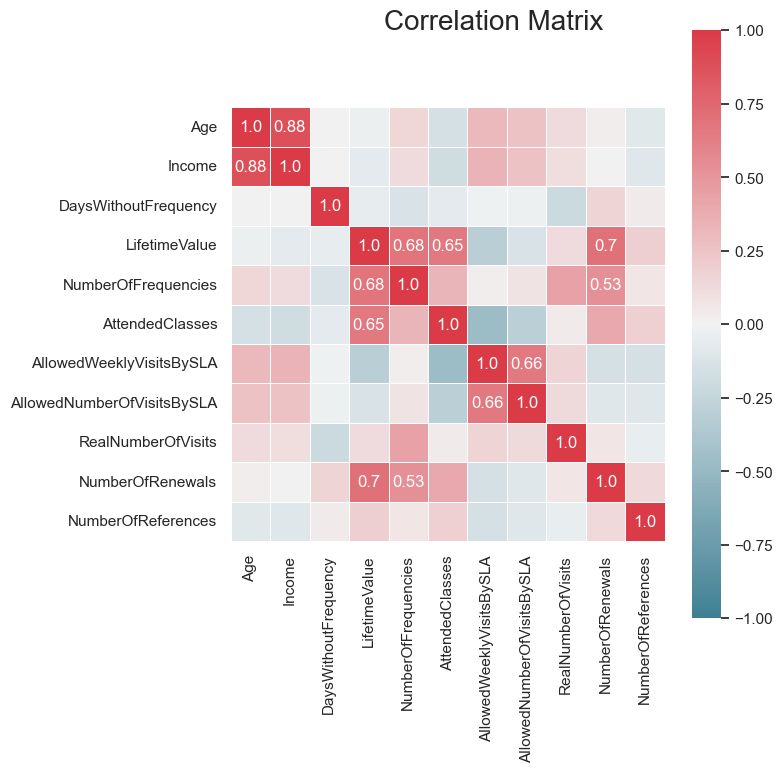

In [152]:
# Prepare figure
fig = plt.figure(figsize=(7, 7))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data[metric_features].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

#plt.savefig(os.path.join('..', 'figures', 'exp_analysis', 'correlation_matrix.png'), dpi=200)

plt.show()

We uncover some important information:
- `Age` and  `Income` are highly correlated;
- `LifetimeValue` is also very correlated with `NumberOfRenewals`, `NumberOfFrequencies` and `AttendedClasses`;

### Relevancy

Selecting variables based on the relevancy of each one to the task. Example: remove uncorrelated variables with the target, stepwise regression, Select variables for different types of clustering, demographic vs activities vs (...) ...

Variables that aren't correlated with any other variable are often also not relevant. 

## Clustering

### Hierarchical Clustering

In [153]:
# Performing HC
hclust = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=5)
hc_labels = hclust.fit_predict(data[metric_features])
hc_labels

array([1, 0, 4, ..., 4, 3, 3], dtype=int64)

In [154]:
# Characterizing the clusters
df_concat = pd.concat((data, pd.Series(hc_labels, name='labels', index=data.index)), axis=1)
df_concat.groupby('labels').mean()

,Age,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,...,Active_Period,Contract_Duration,PercentageOfVisits,TotalNumberOfActivities,MonthlyValue,PercentageOfClasses,Freq_Visits_Day,Freq_Classes_Contract,Visits_ActivePeriod,Gender_Female
labels,,,,,,,,,,,,,,,,,,,,,
0,28.161498,2545.034559,90.916482,210.075930,0.060479,0.006646,0.202481,0.692512,0.031458,0.024147,...,254.196057,367.914931,0.145144,1.093930,27.155111,11.738615,0.108321,0.009335,0.024700,0.594152
1,56.258333,6233.083333,61.309524,391.841905,0.050000,0.004762,0.261905,0.658333,0.010714,0.010714,...,246.917857,489.359524,0.160381,1.094048,34.371012,19.882036,0.126569,0.017554,0.029687,0.627381
2,7.929373,0.583714,64.305775,567.590054,0.002077,0.008309,0.785625,0.011633,0.143332,0.031159,...,256.093893,568.212713,0.213631,1.056502,39.024661,76.600577,0.071483,0.054922,0.017896,0.543415
3,44.464263,4263.493991,72.269450,388.539665,0.078431,0.013283,0.301075,0.607211,0.028463,0.021505,...,254.041113,507.587603,0.166237,1.132827,32.285161,19.397419,0.119854,0.017728,0.028274,0.597090
4,22.367496,1625.987372,66.885981,200.008367,0.046486,0.006040,0.153184,0.715410,0.047767,0.022145,...,251.107613,340.852672,0.137231,1.076501,26.263247,10.495430,0.107849,0.008425,0.023923,0.620425


------

### Profile Report: Might help us to get some info (delete later but refer if necessary)

In [155]:
profile = ProfileReport(
    data, 
    title='Sports Facility Customer Data',
    correlations={
        "pearson": {"calculate": True},
        "spearman": {"calculate": False},
        "kendall": {"calculate": False},
        "phi_k": {"calculate": False},
        "cramers": {"calculate": False},
    },
)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

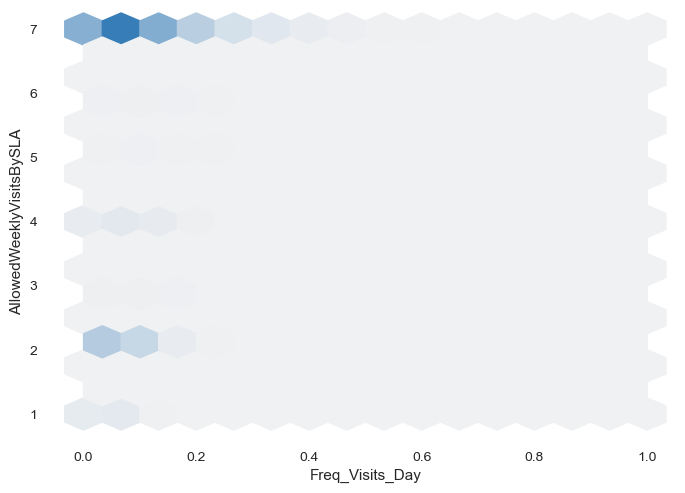

In [156]:
profile.to_notebook_iframe()